In [9]:
import pandas as pd

img_data = pd.read_csv("/home/dnlab/Data-B/my_research/abnormal_driving_FL/train_img_name_and_action.csv")
img_data.head()

,ID,action,img_name
0,occupant1,운전하다,SGA2100164S0183IMG0001.jpg
1,occupant1,운전하다,SGA2100164S0183IMG0002.jpg
2,occupant1,운전하다,SGA2100164S0183IMG0003.jpg
3,occupant1,핸들을놓치다,SGA2100164S0183IMG0004.jpg
4,occupant1,핸들을놓치다,SGA2100164S0183IMG0005.jpg


In [15]:
import csv

class_names = set()
with open("/home/dnlab/Data-B/data/train_img_name_and_action.csv") as csvfile:
    reader = csv.reader(csvfile)
    # skip the header row
    next(reader) 
    for row in reader:
        image_name, category = row
        class_names.add(category)

print(class_names)

#'운전자를향해손을뻗다' '운전자를향해발을뻗다'

{'힐끗거리다', '허벅지두드리기', '하품', '고개를돌리다', '핸드폰쥐기', '뺨을때리다', '물건을쥐다/휘드르다', '박수치다', '어깨를두드리다', '창문을열다', '핸드폰귀에대기', '일어서다', '옆으로기대다', '운전하다', '핸들을흔들다', '몸못가누기', '팔주무르기', '운전자를향해발을뻗다', '무언가를쥐다', '눈깜빡이기', '꾸벅꾸벅졸다', '무언가를마시다', '차량의문열기', '고개를좌우로흔들다', '운전자를향해손을뻗다', '중앙으로손을뻗다', '눈비비기', '침뱉기', '중앙을쳐다보다', '핸들을놓치다', '목을만지다', '무언가를보다', '허리굽히다', '몸을돌리다', '손을뻗다'}


In [11]:
import os
import random
import shutil

src_dir = '/home/dnlab/Data-B/data/main_data/val_ppr_cat/driving'
dst_dir = '/home/dnlab/Data-B/data/main_data/train_cat_new/driving'



all_files = os.listdir(dst_dir)

len(all_files)


3667

In [12]:
from PIL import Image
# Open the image
img = Image.open("/home/dnlab/Data-B/data/train/SGA2100347S0035IMG0001.jpg")
img_pro_val = Image.open("/home/dnlab/Data-B/data/main_data/val_ppr/SGA2100001S0010IMG0004.jpg")
img_pro_train = Image.open("/home/dnlab/Data-B/data/main_data/train_ppr/SGA2100332S0358IMG0002.jpg")
# Get the dimensions

# Print the dimensions
print(f"Image size: {img.size}")
print(f"Preprocessed image size: {img_pro_train.size}")
print(f"Preprocessed image size: {img_pro_val.size}")

Image size: (1280, 720)
Preprocessed image size: (224, 224)
Preprocessed image size: (224, 224)


In [14]:
import os

val_path = "/home/dnlab/Data-B/data/main_data/val_ppr"
train_path = "/home/dnlab/Data-B/data/train"
count_val = len(os.listdir(val_path))
count_train = len(os.listdir(train_path))


print(f"Total number of val files: {count_val}")
print(f"Total number of val files: {count_train}")


Total number of val files: 201921
Total number of val files: 1817306


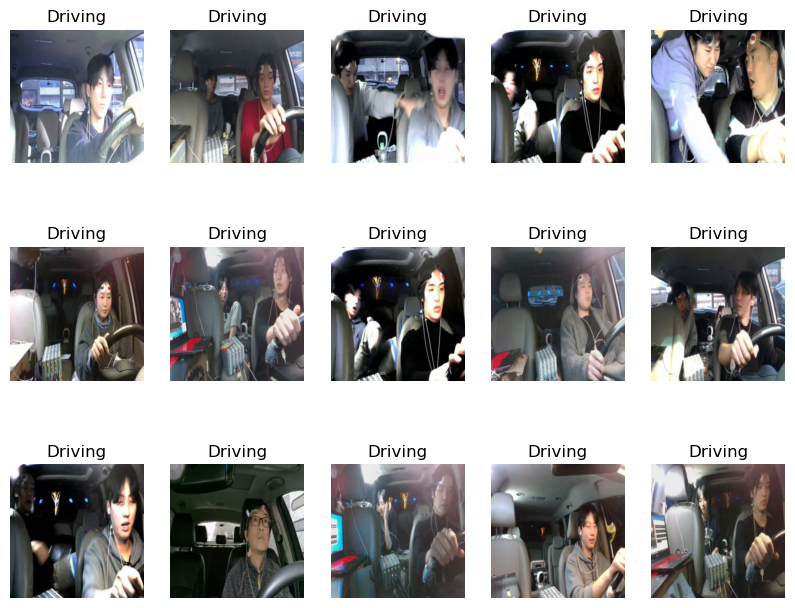

In [17]:
import os
import random
import matplotlib.pyplot as plt
from PIL import Image

# Define the directory path
dir_path = '/home/dnlab/Data-B/data/main_data/train_cat_new/falling_asleep'

# Get a list of all the image files in the directory
img_files = [f for f in os.listdir(dir_path) if f.endswith('.jpg')]

# Select 10 random image files
random_imgs = random.sample(img_files, 15)

# Define the figure size and the number of rows and columns for the subplots
fig = plt.figure(figsize=(10, 8))
rows = 3
cols = 5

# Loop through the selected images and add them to the subplots
for i in range(len(random_imgs)):
    img_path = os.path.join(dir_path, random_imgs[i])
    img = Image.open(img_path)
    ax = fig.add_subplot(rows, cols, i+1)
    ax.imshow(img)
    ax.set_title("Falling asleep")
    ax.axis('off')
    

# Display the subplots
plt.show()


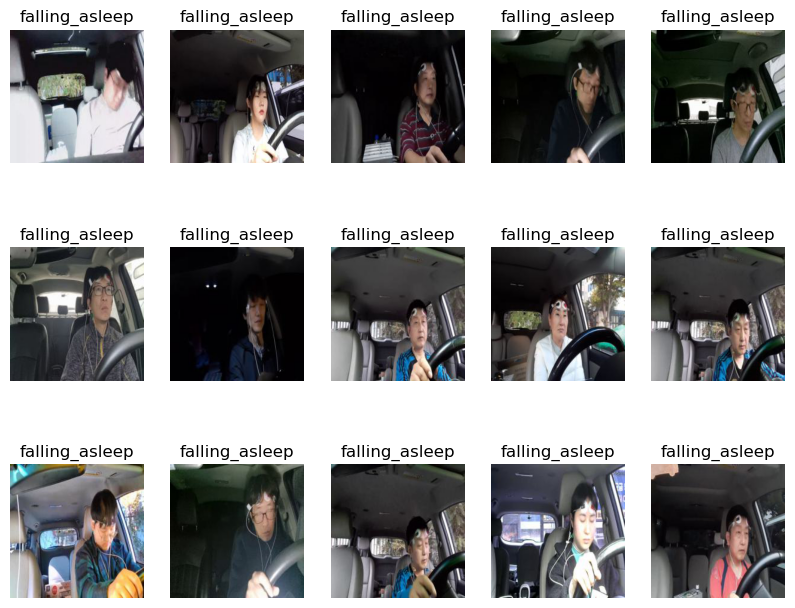

In [13]:
import os
import random
import matplotlib.pyplot as plt
from PIL import Image

# No normalization applied
# Define the directory path
dir_path = '/home/dnlab/Data-B/data/main_data/train_ppr_cat/falling asleep'

# Get a list of all the image files in the directory
img_files = [f for f in os.listdir(dir_path) if f.endswith('.jpg')]

# Select 10 random image files
random_imgs = random.sample(img_files, 15)

# Define the figure size and the number of rows and columns for the subplots
fig = plt.figure(figsize=(10, 8))
rows = 3
cols = 5

# Loop through the selected images and add them to the subplots
for i in range(len(random_imgs)):
    img_path = os.path.join(dir_path, random_imgs[i])
    img = Image.open(img_path)
    ax = fig.add_subplot(rows, cols, i+1)
    ax.imshow(img)
    ax.set_title("falling_asleep")
    ax.axis('off')

# Display the subplots
plt.show()

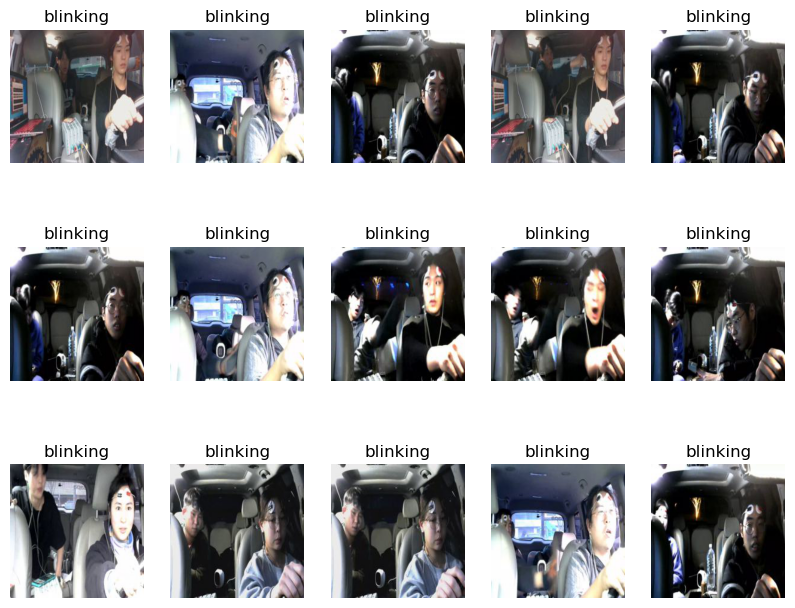

In [8]:
import os
import random
import matplotlib.pyplot as plt
from PIL import Image

# No normalization applied
# Define the directory path
dir_path = '/home/dnlab/Data-B/data/main_data/train_ppr_cat/standing up'

# Get a list of all the image files in the directory
img_files = [f for f in os.listdir(dir_path) if f.endswith('.jpg')]

# Select 10 random image files
random_imgs = random.sample(img_files, 15)

# Define the figure size and the number of rows and columns for the subplots
fig = plt.figure(figsize=(10, 8))
rows = 3
cols = 5

# Loop through the selected images and add them to the subplots
for i in range(len(random_imgs)):
    img_path = os.path.join(dir_path, random_imgs[i])
    img = Image.open(img_path)
    ax = fig.add_subplot(rows, cols, i+1)
    ax.imshow(img)
    ax.set_title("blinking")
    ax.axis('off')

# Display the subplots
plt.show()

In [ ]:
import os
import json
from PIL import Image

# Set the path to the JSON file and the image file
json_file = "path/to/json/file.json"
image_file = "path/to/image/file.jpg"

# Load the JSON data
with open(json_file, "r") as f:
    json_data = json.load(f)

# Get the bounding box values for the face
face_box = json_data["face_b_box"]
left = int(face_box[0])
top = int(face_box[1])
right = int(face_box[2])
bottom = int(face_box[3])

# Open the image
image = Image.open(image_file)

# Crop the image based on the bounding box values
face_image = image.crop((left, top, right, bottom))

# Save the cropped image
output_file = "path/to/output/file.jpg"
face_image.save(output_file)


name1 = ["standing up," "turning head," "driving," "touching neck," "yawning," "shaking head," , "immobile", "being tapped on a shoulder", "holding something", "streching", "being reached by the passeger", "clapping", "drinking", "slapping", "spitting", "massaging an arm", "thigh tapping", "glancing(distracted)", "leaning sideways", "blinking", "putting cellphone to the ear", "being reached by a foot", "openning a window", "reaching the central compartment", "holding things", "holding hands", "hands off the wheel", "holding a cellphone", "bending over", "rubbing the eyes", "falling asleep", "looking at something", "turning around", "steering the wheel", "looking at the center", "openning the door"]

name2 = ["yawning", "spitting" "driving", "extending the hand", "clapping", "rubbing the eyes", "standing up", "bendding over", "immobile", "holding a cell phone", "glancing(distracted)", "slapping", "massaging an arm", "touching the neck", "turning around", "blinking", "opening a window", "holding something/shaking something", "falling asleep", "turning the head", "hands off the wheel", "leaning sideways", "opening the door", "steering the wheel", "holding something", "looking at something", "cellphone at the ear", "looking the center", "drinking", "padding the shoulder", "tapping the thigh", "reaching the middle compartment", "shaking head", "being reached by hand", "being reached by foot"]

print(len(name1), len(name2))

# Fist exp: 35 classes

/tmp/ipykernel_649975/532438492.py:16: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(subdirs, rotation=90)


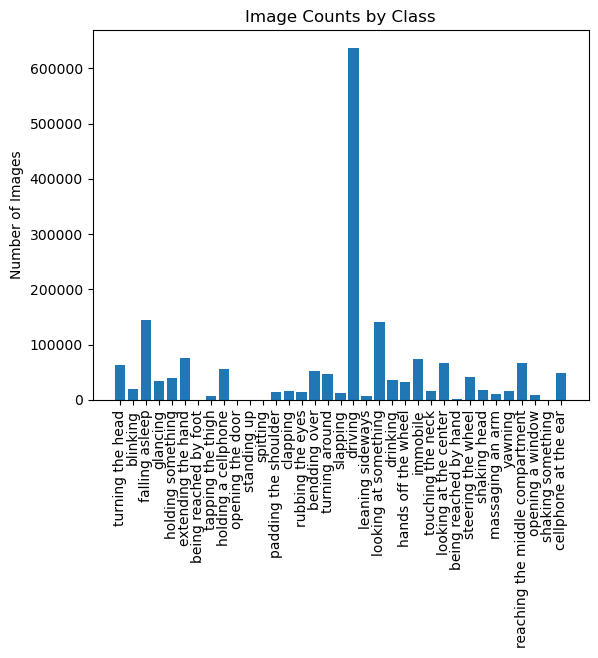

In [43]:
import os
import matplotlib.pyplot as plt

# set the directory containing the subdirectories with images
root_dir = '/home/dnlab/Data-B/data/main_data/train_ppr_cat'

# get the subdirectories
subdirs = os.listdir(root_dir)

# count the number of images in each subdirectory
counts = [len(os.listdir(os.path.join(root_dir, subdir))) for subdir in subdirs]

# create a bar chart to visualize the image counts
fig, ax = plt.subplots()
ax.bar(subdirs, counts)
ax.set_xticklabels(subdirs, rotation=90)
ax.set_ylabel('Number of Images')
ax.set_title('Image Counts by Class')
plt.show()


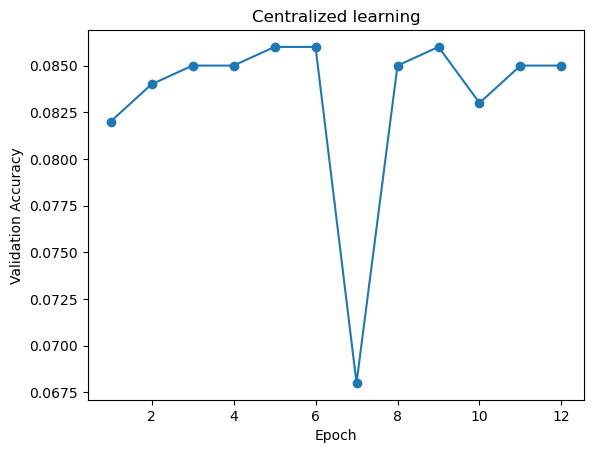

In [2]:
import matplotlib.pyplot as plt

# define the values for x and y axis
epochs = range(1, 13)
val_accuracy = [0.082, 0.084, 0.085, 0.085, 0.086, 0.086, 0.068, 0.085, 0.086, 0.083, 0.085, 0.085]

# create the plot
plt.plot(epochs, val_accuracy, marker='o')

# set the labels for the axes
plt.xlabel('Epoch')
plt.ylabel('Validation Accuracy')

# set the title for the plot
plt.title('Centralized learning')

# display the plot
plt.show()


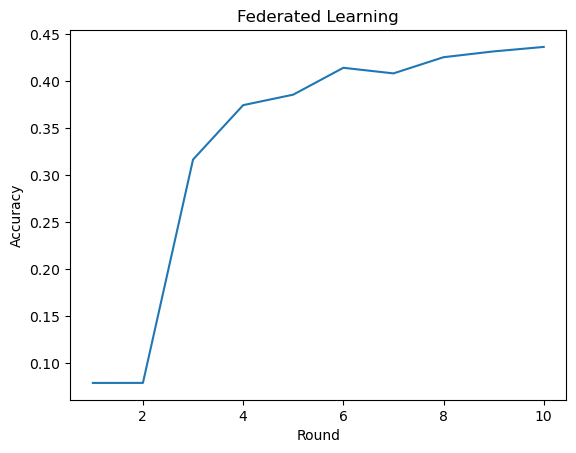

In [4]:
import matplotlib.pyplot as plt

metrics = {'accuracy': [(1, 0.0792336926310109), (2, 0.07925845491310282), (3, 0.31666931422939965), 
                        (4, 0.3745091134675169), (5, 0.38568678425450276), (6, 0.41423771390142006), 
                        (7, 0.40828485309464474), (8, 0.4254947192523431), (9, 0.43166053107411156), 
                        (10, 0.43642488146322717)]}

x = [entry[0] for entry in metrics['accuracy']]
y = [entry[1] for entry in metrics['accuracy']]

plt.plot(x, y)
plt.xlabel('Round')
plt.ylabel('Accuracy')
plt.title('Federated Learning')
plt.show()


# Second exp 3 classes - 9k train, 1k val

## Without augmentation

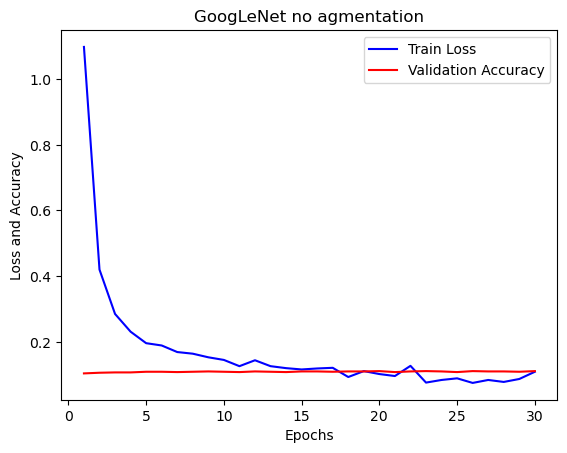

In [14]:
import matplotlib.pyplot as plt

train_loss_list = [1.098, 0.420, 0.285, 0.231, 0.196, 0.189, 0.169, 0.164, 0.153, 0.145, 0.126, 0.144, 0.126, 0.120, 0.116, 0.119, 0.121, 0.093, 0.111, 0.102, 0.096, 0.127, 0.076, 0.084, 0.089, 0.075, 0.084, 0.078, 0.087, 0.109]
val_accuracy_list = [0.104, 0.106, 0.107, 0.107, 0.109, 0.109, 0.108, 0.109, 0.110, 0.109, 0.108, 0.110, 0.109, 0.108, 0.110, 0.110, 0.109, 0.110, 0.110, 0.111, 0.108, 0.110, 0.111, 0.110, 0.108, 0.111, 0.110, 0.110, 0.109, 0.111]

epochs = range(1, 31)

plt.plot(epochs, train_loss_list, 'b', label='Train Loss')
plt.plot(epochs, val_accuracy_list, 'r', label='Validation Accuracy')
plt.title('GoogLeNet no agmentation')
plt.xlabel('Epochs')
plt.ylabel('Loss and Accuracy')
plt.legend()
plt.show()


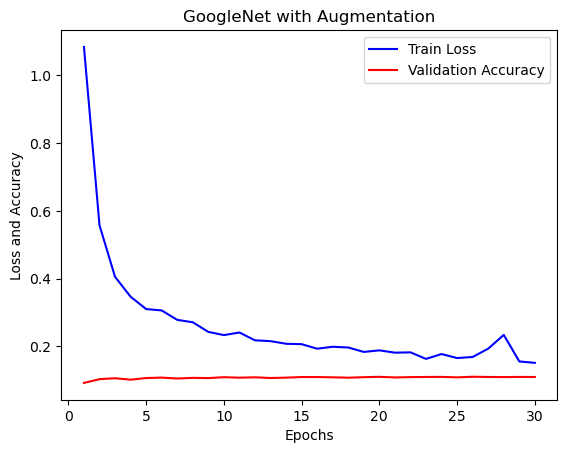

In [15]:
import matplotlib.pyplot as plt

train_loss_list = [1.0832131383336034, 0.557327033344885, 0.405354790012924, 0.3466930286125525, 0.31029675555621733, 0.3062527679865685, 0.2784739397164422, 0.2713245125832608, 0.24299878976702244, 0.23356847557441685, 0.24121001366581543, 0.21812794134020966, 0.21574532489369933, 0.20794473105523043, 0.20681513211166339, 0.1934548395529195, 0.199148253379831, 0.1969557850573262, 0.18390790792898992, 0.18858976857484122, 0.1817253034373304, 0.18268449701616274, 0.16339368897563097, 0.17769443103226534, 0.16590303644743393, 0.1690450903887064, 0.19360178138951692, 0.23418114820970323, 0.15593359965964776, 0.15171091903444553]
val_accuracy_list = [0.09255400811492488, 0.1036297839675403, 0.10637131264393025, 0.10209452790876193, 0.10691961837920824, 0.10823555214387542, 0.10560368461454107, 0.10746792411448623, 0.10680995723215266, 0.109441824761487, 0.10801622984976422, 0.10911284132032022, 0.10702927952626384, 0.10812589099681982, 0.1098804693497094, 0.1098804693497094, 0.10911284132032022, 0.10801622984976422, 0.109441824761487, 0.11053843623204299, 0.10878385787915341, 0.10966114705559821, 0.1100997916438206, 0.11031911393793178, 0.10900318017326462, 0.11075775852615419, 0.1100997916438206, 0.1097708082026538, 0.1102094527908762, 0.109990130496765]

epochs = range(1, 31)

plt.plot(epochs, train_loss_list, 'b', label='Train Loss')
plt.plot(epochs, val_accuracy_list, 'r', label='Validation Accuracy')
plt.title('GoogleNet with Augmentation')
plt.xlabel('Epochs')
plt.ylabel('Loss and Accuracy')
plt.legend()
plt.show()


# Sec exp

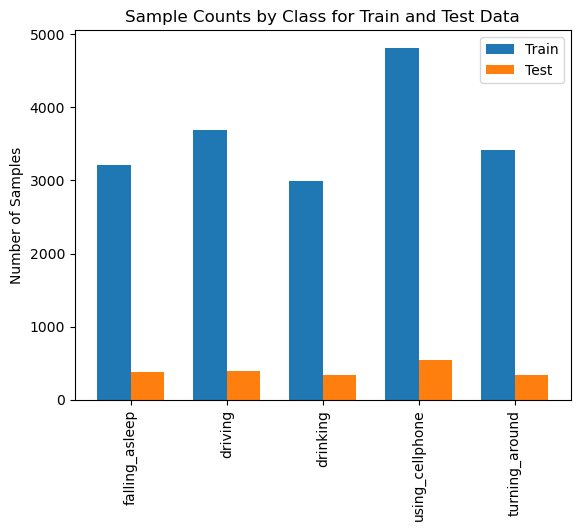

In [2]:
import os
import matplotlib.pyplot as plt
import numpy as np

# define the directories for train and test data
train_dir = '/home/dnlab/Data-B/data/main_data/train_cat_new'
test_dir = '/home/dnlab/Data-B/data/main_data/val_cat_new'

# get the subdirectories (i.e., class labels) in the train directory
train_subdirs = os.listdir(train_dir)

# create empty lists to store the number of train and test samples for each class
train_counts = []
test_counts = []

# loop through the subdirectories to count the number of samples in each class for train and test data
for subdir in train_subdirs:
    train_count = len(os.listdir(os.path.join(train_dir, subdir)))
    test_count = len(os.listdir(os.path.join(test_dir, subdir)))
    train_counts.append(train_count)
    test_counts.append(test_count)

# create a bar chart to visualize the sample counts for train and test data for each class
fig, ax = plt.subplots()
x = np.arange(len(train_subdirs))
width = 0.35
ax.bar(x - width/2, train_counts, width, label='Train')
ax.bar(x + width/2, test_counts, width, label='Test')
ax.set_xticks(x)
ax.set_xticklabels(train_subdirs, rotation=90)
ax.set_ylabel('Number of Samples')
ax.set_title('Sample Counts by Class for Train and Test Data')
ax.legend()
plt.show()
